## Accuracy(정확도)

In [2]:
import numpy as np
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    # fit() 메소드는 아무것도 학습하지 않음
    def fit(self, X, y=None):
        pass
    
    # predict() 메소드는 단순히 Sex feature가 1이면 0, 아니면 1로 예측
    def predict(self, X):
        pred = np.zeros((X.shape[0], 1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else:
                pred[i] = 1
        return pred

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 data preprocessing 함수 연달아 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 원본 데이터를 재로딩, 데이터 가공, 학습/테스트 데이터 분할
titanic_df = pd.read_csv("./titanic_train.csv")
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop(['Survived'], axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=0)

# 위에서 생성한 Dummy Classifier를 활용해서 학습, 예측, 평가 수행
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print("Dummy Classifier의 정확도는:", np.round(accuracy_score(y_test, mypredictions), 4))

Dummy Classifier의 정확도는: 0.7877


In [5]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass
    
    # 입력값으로 들어오는 X 데이터 셋의 크기만큼 모두 0으로 만들어서 반환
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

# MNIST 데이터 로딩
digits = load_digits()

print(digits.data)
print("### digits.data.shape:", digits.data.shape)
print("### digits.target.shape:", digits.target.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
### digits.data.shape: (1797, 64)
### digits.target.shape: (1797,)


In [6]:
# digits 번호가 7번이면 True, 아니면 False -> astype(int)로 긱긱 1, 0으로 변환
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

In [7]:
# 불균형한 레이블 데이터 분포도 확인
print("레이블 테스트 세트 크기:", y_test.shape)
print("테스트 세트 레이블 0과 1의 분포도")
print(pd.Series(y_test).value_counts())

# Dummy Classifier로 학습/ 예측/ 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)
print("모든 예측을 0으로 했을때 정확도:", np.round(accuracy_score(y_test, fakepred), 4))

레이블 테스트 세트 크기: (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
Name: count, dtype: int64
모든 예측을 0으로 했을때 정확도: 0.9


## Confusion Matrix

- 오차행렬은 **이진 분류**의 예측 오류가 얼마인지와 더불어 어떠한 유형의 예측 오류가 발생하고 있는지 함께 나타내는 지표

In [8]:
from sklearn.metrics import confusion_matrix

# 앞 절의 예측 결과인 fakepred와 실제 결과인 y_test의 Confusion matrix 출력
confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]])

## 정밀도(precision)와 재현율(recall)

- 정밀도 = TP / (FP + TP)
    - 예측을 Positive로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율
- 재현율 = TP / (FN + TP)
    - 실제 값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율

MyFakeClassifier의 예측 결과로 정밀도와 재현율 측정

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("정밀도:", precision_score(y_test, fakepred))
print("재현율:", recall_score(y_test, fakepred))

정밀도: 0.0
재현율: 0.0


/Users/jman/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


오차행렬, 정확도, 정밀도, 재현율을 한꺼번에 계산하는 함수 생성

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print("오차행렬")
    print(confusion)
    print(f"정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}")

In [11]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

# 원본 데이터 재로딩, 가공, 분할
titanic_df = pd.read_csv("./titanic_train.csv")
y_titanic_df = titanic_df["Survived"]
X_titanic_df = titanic_df.drop(["Survived"], axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                   test_size=0.2, random_state=11)

lr_clf = LogisticRegression(solver="liblinear")

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705


In [12]:
X_test.shape

(179, 8)

## Precision/Recall trade-off

predict_proba() 메소드 확인

In [13]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print(f'pred_proba()결과 Shape: {pred_proba.shape}')
print(f'pred_proba array에서 앞 3개 샘플 추출\n', pred_proba[:3])

# 예측확률 array와 예측확률값 array를 concatenate해서 한 눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis=1)
print('\n두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측\n', pred_proba_result[:3])

pred_proba()결과 Shape: (179, 2)
pred_proba array에서 앞 3개 샘플 추출
 [[0.44935229 0.55064771]
 [0.86335514 0.13664486]
 [0.86429646 0.13570354]]

두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측
 [[0.44935229 0.55064771 1.        ]
 [0.86335514 0.13664486 0.        ]
 [0.86429646 0.13570354 0.        ]]


Binarizer 활용

In [14]:
from sklearn.preprocessing import Binarizer

X = [[1, -1, 2],
     [2, 0, 0],
     [0, 1.1, 1.2]]

# threshold 기준값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


분류 결정 임곗값 0.5 기반에서 Binarizer를 이용하여 예측값 반환

In [15]:
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 설정값 = 분류 결정 임곗값
custom_threshold = 0.5

# predict_proba() 반환값의 두번째 컬럼(=positive 클래스) 추출해서 Binarizer 적용
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

# 기존 fit -> predict와 동일한 결과값
get_clf_eval(y_test, custom_predict)

오차행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705


분류 결정 임곗값 0.4 기반에서 Binarizer를 이용하여 예측값 반환

In [16]:
# Binarizer의 threshold 설정값을 0.4로 설정 (분류결정임값을 0.5에서 0.4로 낮춤)
custom_threshold = 0.4
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197


여러 개의 분류 결정 임곗값을 변경하면서 Binarizer를 이용하여 예측값 변환

In [17]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    # thresholds 리스트 객체 내의 값을 차례로 iteration하면서 evaluation
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print("\n임곗값:", custom_threshold)
        get_clf_eval(y_test, custom_predict)

get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)    


임곗값: 0.4
오차행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197

임곗값: 0.45
오차행렬
[[105  13]
 [ 13  48]]
정확도: 0.8547, 정밀도: 0.7869, 재현율: 0.7869

임곗값: 0.5
오차행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705

임곗값: 0.55
오차행렬
[[111   7]
 [ 16  45]]
정확도: 0.8715, 정밀도: 0.8654, 재현율: 0.7377

임곗값: 0.6
오차행렬
[[113   5]
 [ 17  44]]
정확도: 0.8771, 정밀도: 0.8980, 재현율: 0.7213


precision_recall_curve()를 이용하여 임곗값에 따른 정밀도-재현율 값 추출

In [18]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

# 실제값 데이터 셋과 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print("임계값 배열의 shape:", thresholds.shape)
print("preicisions 배열의 shape:", precisions.shape)
print("recalls 배열의 shape:", recalls.shape)
## thresholds가 1 적은데, 마지막 precision, recall 값은 항상 1, 0 인데 여기에 해당하는threshold 값이 없기 때문이다

print("thresholds 5 samples:", thresholds[:5])
print("precisions 5 samples:", precisions[:5])
print("recalls 5 samples:", recalls[:5])

# 반환된 임곗값 배열 로우가 165건. 샘플로 10건만 추출하되 15 Step으로 추출
thr_index = np.arange(0, thresholds.shape[0], 15)
print('\n샘플 추출을 위한 임곗값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값:', np.round(thresholds[thr_index], 2))

# 15 step 단위로 추출된 임곗값에 따른 정밀도와 재현율 값
print("\n샘플 임곗값별 정밀도:", np.round(precisions[thr_index], 3))
print("샘플 임곗값별 재현율:", np.round(recalls[thr_index], 3))

임계값 배열의 shape: (165,)
preicisions 배열의 shape: (166,)
recalls 배열의 shape: (166,)
thresholds 5 samples: [0.01974987 0.06956412 0.08402807 0.08474206 0.0892016 ]
precisions 5 samples: [0.34078212 0.34269663 0.34463277 0.34659091 0.34857143]
recalls 5 samples: [1. 1. 1. 1. 1.]

샘플 추출을 위한 임곗값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135 150]
샘플용 10개의 임곗값: [0.02 0.11 0.13 0.14 0.16 0.24 0.32 0.45 0.62 0.73 0.87]

샘플 임곗값별 정밀도: [0.341 0.372 0.401 0.44  0.505 0.598 0.688 0.774 0.915 0.968 0.938]
샘플 임곗값별 재현율: [1.    1.    0.967 0.902 0.902 0.902 0.869 0.787 0.705 0.492 0.246]


임곗값의 변경에 따른 정밀도-재현율 변화 곡선을 그림으로 표현

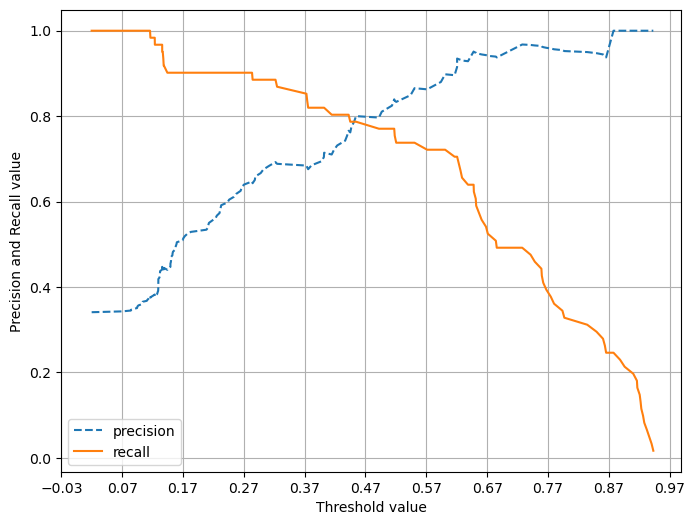

In [19]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precision, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # X축을 threshold 값으로, Y축은 정밀도, 재현율 값으로 각각 plot
    # 정밀도(precision)는 점선으로 표시
    plt.figure(figsize=(8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precision[0: threshold_boundary], linestyle="--", label="precision")
    plt.plot(thresholds, recalls[0: threshold_boundary], label="recall")
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])

## F1 Score

<br />

- F1 스코어는 정밀도와 재현율을 결합한 지표로, 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가짐
- 정밀도와 재현율의 조화 평균값
    - 조화평균: 주어진 수들의 역수의 산술평균의 역수

### 정밀도와 재현율의 맹점
<br />

- 정밀도를 100%로 만드는 법
    - 확실히 Positive인 경우만 Positive로 예측하고 나머지는 모두 Negative로 예측한다. 이때 Precision = TP / (TP + FP)가 1이 된다

<br />
    
- 재현율을 100%로 만드는 법
    - 모두 Positive로 예측한다. 이때 recall = TP / (TP + FN)가 항상 1이 된다

<br />


In [24]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print("F1 스코어:", np.round(f1, 4))

F1 스코어: 0.7966


In [28]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    precision = np.round(precision_score(y_test, pred), 4)
    recall = np.round(recall_score(y_test, pred), 4)
    # F1 스코어 추가
    f1 = np.round(f1_score(y_test, pred), 4)
    
    print("오차 행렬")
    print(confusion)
    # F1 score print 추가
    print(f"정확도: {accuracy}, 정밀도: {precision}, 재현율: {recall}, F1: {f1}")

thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)


임곗값: 0.4
오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197, F1: 0.7576

임곗값: 0.45
오차 행렬
[[105  13]
 [ 13  48]]
정확도: 0.8547, 정밀도: 0.7869, 재현율: 0.7869, F1: 0.7869

임곗값: 0.5
오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705, F1: 0.7966

임곗값: 0.55
오차 행렬
[[111   7]
 [ 16  45]]
정확도: 0.8715, 정밀도: 0.8654, 재현율: 0.7377, F1: 0.7965

임곗값: 0.6
오차 행렬
[[113   5]
 [ 17  44]]
정확도: 0.8771, 정밀도: 0.898, 재현율: 0.7213, F1: 0.8


## ROC Curve와 AUC

<br />

- ROC곡선은 FPR(False Positive Rate)이 변할 때 TPR(True Positive Rate)이 어떻게 변하는지를 나타내는 곡선 (FPR과 TPR이 변하는 곡선은 Threshold의 변화에 따라 형성됨)
- FPR을 X축, TPR을 Y축으로 잡으면 FPR의 변화에 따른 TPR의 변화가 곡선 형태로 나타남
- AUC(Area Under Curve)값은 ROC곡선 밑의 면적을 구한 값으로 일반적으로 1에 가까울수록 좋은 수치이며, AUC값이 높을 수록 분류 모델의 성능 지표가 좋다고 판단한다
- 중간을 가로지르는 대각선은 랜덤으로 찍은 것의 확률을 나타낸다 (사용이 불가한 모델의 성능이라고 보면 됨)
- Y축에 있는 TPR은 재현율을 나타낸다. 재현율은 민감도(sensitivity)로도 불린다
- X축에 있는 FPR은 실제 Negative를 Positive로 잘못 예측한 비율을 나타낸다. FPR = FP / (FP + TN). FPR은 1-특이도(specificity)
    - 임곗값을 1로 하면 FPR은 0, 임곗값을 0으로 하면 FPR은 1이 된다

In [42]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임곗값 배열에서 샘플로 데이터를 추출하되 step=5로 추출
# threshold[0]은 여기서는 inf로 나옴. 이를 제외하기 위해 np.arange 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
print("샘플 추출을 위한 임곗값 배열의 index:", thr_index)
print("\n샘플 index로 추출한 임곗값:", np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임곗값에 따른 FPR, TPR 값
print("샘플 임곗값별 FPR:", np.round(fprs[thr_index], 3))
print("샘플 임곗값별 TPR:", np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index: [ 1  6 11 16 21 26 31 36 41 46]

샘플 index로 추출한 임곗값: [0.94 0.73 0.62 0.52 0.44 0.28 0.15 0.14 0.13 0.12]
샘플 임곗값별 FPR: [0.    0.008 0.025 0.076 0.127 0.254 0.576 0.61  0.746 0.847]
샘플 임곗값별 TPR: [0.016 0.492 0.705 0.738 0.803 0.885 0.902 0.951 0.967 1.   ]


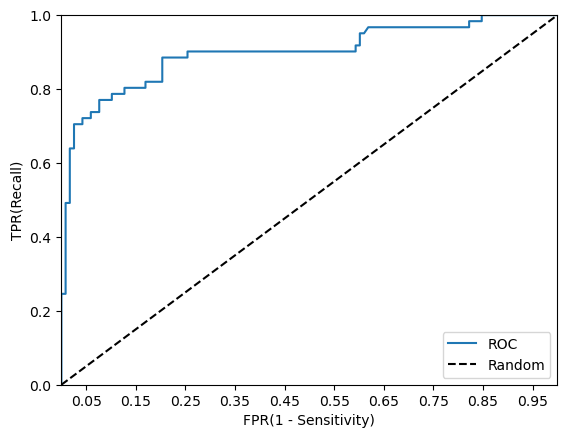

In [48]:
def roc_curve_plot(y_test, pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음
    fprs, trps, thresholds = roc_curve(y_test, pred_proba_c1)
    
    # ROC Curve를 plot 곡선으로 그림
    plt.plot(fprs, tprs, label="ROC")
    # 가운데 대각선 직선을 그림
    plt.plot([0, 1], [0, 1], 'k--', label="Random")
    
    # FPR X축의 Scale을 0.1 단위로 변경, 축 이름 설정 등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1); plt.ylim(0, 1)
    plt.xlabel("FPR(1 - Sensitivity)"); plt.ylabel("TPR(Recall)")
    plt.legend()
    plt.show()

roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])

In [50]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print("ROC AUC 값:", np.round(roc_score, 4))

ROC AUC 값: 0.8987


In [57]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    precision = np.round(precision_score(y_test, pred), 4)
    recall = np.round(recall_score(y_test, pred), 4)
    f1 = np.round(f1_score(y_test, pred), 4)
    # ROC AUC 추가
    roc_auc = np.round(roc_auc_score(y_test, pred_proba), 4)
    print("오차 행렬")
    print(confusion)
    # ROC AUC print 추가
    print(f"정확도: {accuracy}, 정밀도: {precision}, 재현율: {recall}, F1: {f1}, AUC: {roc_auc}")

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705, F1: 0.7966, AUC: 0.8987
